### **Лабораторная работа №1**
### Анализ сходства текстов с помощью расстояния Жаккарда
#### *Выполнил: студент группы 8ПМ11, Кайдаров Алибек*

Цель работы: разработать программу на языке программирования Python, обрабатывающую тексты и определяющая их сходство по
расстоянию Жаккарда (Жаккара). Результаты работы оформляются в виде .ipynb файла с markdown-заметками в самом файле.
Рекомендуется использовать платформу Anaconda 3 (Jupyter Notebook).
Входные данные: 50 текстов объемом от 10 предложений каждое. Исходные тексты, собранные вручную,
должны храниться в файле формата по выбору студента (.csv, .json, .xlsx и т.д.)
Выходные данные: тепловая карта сходства (heatmap) текстов 50 на 50.


Импорт необходимых библиотек.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import pymorphy2
import re
from time import sleep
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
# nltk.download()

# Не исполнять!

Сохранение страницы с сылками на тексты в *.html* формате.

In [2]:
# url = "https://ranobelib.ru/tensei-shitara-slime-datta-ken/page/8/"
# request = requests.get(url)
# source = request.text
# with open("TenSura.html", "w", encoding="utf-8") as file:
#     file.write(source)

Анализируя код, можно заметить, что все ссылки объединены общим классом *ttl*.

Ниже представлен цикл в ходе исполнения которого в словарь *chapters_dict* записываются пары ключ-значение, ключом являются названия
глав, значением ссылка на главу.

In [3]:
# chapters_dict = {}
# for i in range(8, 1, -1):
#     url = f"https://ranobelib.ru/tensei-shitara-slime-datta-ken/page/{i}/"
#     request = requests.get(url)
#     request.encoding = "utf-8"
#     soup = BeautifulSoup(request.text, "lxml")
#     chapters_raw = soup.find_all(class_="ttl")
#     for elem in chapters_raw:
#         chapters_dict[elem.text.replace("\t","").replace("\n","").replace("ЧИТАТЬ", "")] = elem.get("href")

Из словаря создан датафрейм, сохраненный в формате *.csv*.

In [4]:
# chapters_df = pd.DataFrame.from_dict(chapters_dict, orient="index").rename(columns={0:"href"})
# chapters_df.to_csv("TenSura_href.csv", encoding="utf-8-sig")

Открытие файла с ссылками и создание из него нового датафрейма *hrefs_frame* содержащего 2 колонки: название главы и ссылка на неё

In [5]:
# hrefs_frame = pd.read_csv("TenSura_href.csv")
# hrefs_frame.columns = ["chapter_name", "href"]
# hrefs_frame = hrefs_frame.sort_values(by="chapter_name")
# hrefs_frame = hrefs_frame.set_index("chapter_name")

Создание цикла для обхода *hrefs_frame* и записи текста. После завершения цикла, из полученного словаря с парами
 "название главы" - "содержимое главы" создан новый датафрейм сохраненный в формате *.csv*
 При обработке из текста удаляются элементы HTML разметки.

In [6]:
# content_dict = {}
# for index, row in hrefs_frame.iterrows():
#     request = requests.get(row[0])
#     request.encoding = "utf-8"
#     soup = BeautifulSoup(request.text, "lxml")
#     content_raw = soup.find_all(class_="text")
#     content = [elem.text.replace("\n","") for elem in content_raw][0]
#     content = re.sub(r"\s+", " ", content)
#     content_dict[index] = content
#     sleep(5)
#     print(f"{index} загружена!")
# print("Все главы загружены!")

In [7]:
# content_df = pd.DataFrame.from_dict(content_dict, orient="index").rename(columns={0:"content"})
# content_df.to_csv("TenSura_content.csv", encoding="utf-8-sig", sep=";")

# Начинать исполнение здесь!

Из полученного файла создан датафрейм *content_frame* содержащий название главы и текст, готовый к дальнейшей обработке

In [8]:
content_frame = pd.read_csv("TenSura_content.csv", sep=";")
content_frame = content_frame.dropna(subset = ["content"], inplace=False)
content_frame.columns = ["chapter", "content"]
content_frame

,chapter,content
0,"Глава 1. Давайте посмотрим, на что я способен",Темно. Темнота мешает мне разглядеть любую фор...
1,Глава 10. Битва у деревни Гоблинов,Клан Волчьего Клыка. Правители восточных равни...
2,Глава 100. Подземный лабиринт,"Попрощавшись с Фьюзом, я отправился обратно в ..."
3,Глава 101. Чёткий план,"Мы добрались до последнего этажа, где будет жи..."
4,Глава 102. Аудиенция с монстрами,"С тех пор, как я стал владыкой демонов, прошло..."
...,...,...
305,Дополнительная история 3.2. Элегантный план по...,"Отказавшись от попыток избавиться от Диабло, С..."
306,Дополнительная история 3.3. Элегантный план по...,"Прошло некоторое время после того, как корабль..."
307,Дополнительная история 4.1. Элегантный план по...,Остров Мальдоленд. Мое магическое восприятие у...
308,Дополнительная история 4.2. Элегантный план по...,"«Действия» и «движение» — это области, где чел..."


Датасет содержит 309 текстов.
Для анализа выбрано 50 текстов с наибольшим количеством символов.
Для отбора в датафрейме создана отдельная колонка, содержащая количество символов в соответствующем тексте, датафрейм отсортирован по убыванию
 и выбрано 50 первых значений.

In [9]:
len_list = []
for index, row in content_frame.iterrows():
    len_list.append((len(content_frame["content"][index])))
content_frame["content_len"] = len_list
content_frame = content_frame.sort_values(by="content_len", ascending=False)
content_frame = content_frame.iloc[:50]
content_frame

,chapter,content,content_len
266,Глава 69. Рождение повелителя Демонов,"После того, как разговор касательно Йому был и...",29016
263,Глава 66. Случайная встреча,"После отправки Груциуса в Темпест, я попытался...",28592
5,Глава 103. Монстры-рабы,"Реакция тех, кто испытывает страх, может услож...",28290
297,Глава 97. Компенсация и последующие отношения,"Произошло много вещей, а потом всё неожиданно ...",26877
98,Глава 185. Начало новой игры,"Я бросил вызов Юуки, и мы начали прикидывать с...",23072
44,Глава 139. Полная история встречи,Вчерашний кекс был восхитителен. Поэтому я ещё...,22950
118,Глава 198. Гобута и Карион против Веги из Четы...,— Я умру-ссу! Вот это сейчас было серьёзно опа...,22559
276,Глава 78. Демоны-лорды,Демон-лорд Клэйман никогда раньше так не нервн...,22508
77,Глава 167. Точка разветвления эпохи,На лесных дорогах неподалёку от столицы Импери...,22412
56,Глава 149. Вечер перед началом войны,Перед Императором должно было начаться Совещан...,22375


Преобразование датафрейма:
- из колонки *chapter* удалены все символы, кроме номера глав
- колонка *chapter* выбрана индексирующей;
- из датафрейма удалена колонка *content_len*.

In [10]:
chapter_split = content_frame["chapter"].str.split(r" ", expand=True)
chapter_split = chapter_split[1].str.rstrip(".")
content_frame["chapter"] = chapter_split
content_frame = content_frame.set_index("chapter", drop=True).drop(["content_len"], axis=1)
content_frame

,content
chapter,
69,"После того, как разговор касательно Йому был и..."
66,"После отправки Груциуса в Темпест, я попытался..."
103,"Реакция тех, кто испытывает страх, может услож..."
97,"Произошло много вещей, а потом всё неожиданно ..."
185,"Я бросил вызов Юуки, и мы начали прикидывать с..."
139,Вчерашний кекс был восхитителен. Поэтому я ещё...
198,— Я умру-ссу! Вот это сейчас было серьёзно опа...
78,Демон-лорд Клэйман никогда раньше так не нервн...
167,На лесных дорогах неподалёку от столицы Импери...


Для дальнейшего анализа каждый текст необходимо преобразовать. Для этого создана функция *clear_text()*
Функция принимает на вход текст, в ходе исполнения происходят следующие действия:
- все буквенные символы переводятся в строчный формат;
- знаки пунктуации и специальные символы заменяются знаком *пробел*;
- токенизация, в результате текст переходит в формат *list* содержащий слова;
- лист отчищается от слов указанных в словаре библиотеки *nltk*;
- нормализация слов с помощью функций библиотеки *pymorphy2*.
Функция возвращает объект типа *list* содержащий слова и готовый к дальнейшему анализу.

In [11]:
morphy = pymorphy2.MorphAnalyzer()
stopwords_list = stopwords.words("russian")

def clear_text(text: str):
    text = text.lower()
    text = re.sub(r"[^А-Яа-я]+", " ", text)
    tokenized_text = nltk.word_tokenize(text, language="russian")
    clear_list = [word for word in tokenized_text if word not in stopwords_list]
    for i in range(len(clear_list)):
        clear_list[i] = morphy.parse(clear_list[i])[0].normal_form
    return clear_list

Для кажого текста в *content_frame* применена функция *clear_text()*, полученные данные занесены в новую колонку.

In [12]:
content_clear_list = []
for index, row in content_frame.iterrows():
    content_clear_list.append(clear_text(content_frame["content"][index]))
content_frame["content"] = content_clear_list
content_frame

,content
chapter,
69,"[разговор, касательно, йома, исчерпать, начать..."
66,"[отправка, груциуса, темпест, попытаться, верн..."
103,"[реакция, тот, испытывать, страх, усложнить, д..."
97,"[произойти, вещь, вс, неожиданно, перетечь, ба..."
185,"[бросить, вызов, юук, начать, прикидывать, сил..."
139,"[вчерашний, кекс, восхитительный, поэтому, ещ,..."
198,"[умереть, ссать, это, серь, зно, опасно, ясно,..."
78,"[демон, лорд, клэйман, ранний, нервничать, чел..."
167,"[лесной, дорога, неподать, ку, столица, импери..."


Для анализа сходства текстов реализован расчет коэффициента Танимото.
Данный метод сравнивает элементы двух наборов, чтобы увидеть, какие элементы являются общими, а какие различаются.
Реализуется метод следующим образом:
1) расчет количества общих элементов выборок;
2) расчёт количества всех элементов выборок;
3) расчет отношения количества общих элементов к количеству всех элементов
Полученное число принимает значения от 0 до 1, при этом чем ближе к 1 результат расчета, тем больше сходство текстов.

$$ J=intersection(A, B) / union(A, B), $$
где *A*, *B* соответствующие выборки
Функция *jac_index()* воращает рассчитанный индекс Жаккарда в процентах с округленным значением

In [13]:
def tan_index(a: list, b: list):
    return round((len(set(a).intersection(set(b))) / (len(set(a)) + len(set(b)) - len(set(a).intersection(set(b))))) * 100)

С помощью функции *jac_index()* рассчитан индекс Жаккарда для всех комбинаций текстов

In [14]:
for ind, row in content_frame.iterrows():
    content_frame[ind] = [tan_index(row["content"], content_frame["content"][i]) for i in content_frame.index]
content_frame = content_frame.drop("content", axis=1)
content_frame

,69,66,103,97,185,139,198,78,167,149,...,181,183,81,197,84,94,158,175,193,63
chapter,,,,,,,,,,,,,,,,,,,,,
69,100,25,19,22,20,18,18,19,19,18,...,18,17,18,19,18,21,18,17,17,19
66,25,100,21,23,21,18,20,20,20,18,...,18,19,19,19,17,22,18,19,17,21
103,19,21,100,21,19,21,18,19,20,21,...,17,18,18,18,19,19,18,17,18,18
97,22,23,21,100,19,19,18,21,19,20,...,18,18,18,18,19,23,18,17,19,17
185,20,21,19,19,100,19,21,19,23,19,...,22,23,18,22,18,20,20,21,20,18
139,18,18,21,19,19,100,17,17,17,19,...,16,17,17,18,17,17,18,15,16,16
198,18,20,18,18,21,17,100,18,21,18,...,20,20,18,21,15,18,19,21,20,16
78,19,20,19,21,19,17,18,100,20,18,...,16,17,19,19,17,21,18,16,16,19
167,19,20,20,19,23,17,21,20,100,21,...,22,21,17,19,17,19,20,20,18,16


На основе полученной матрицы создана тепловая карта

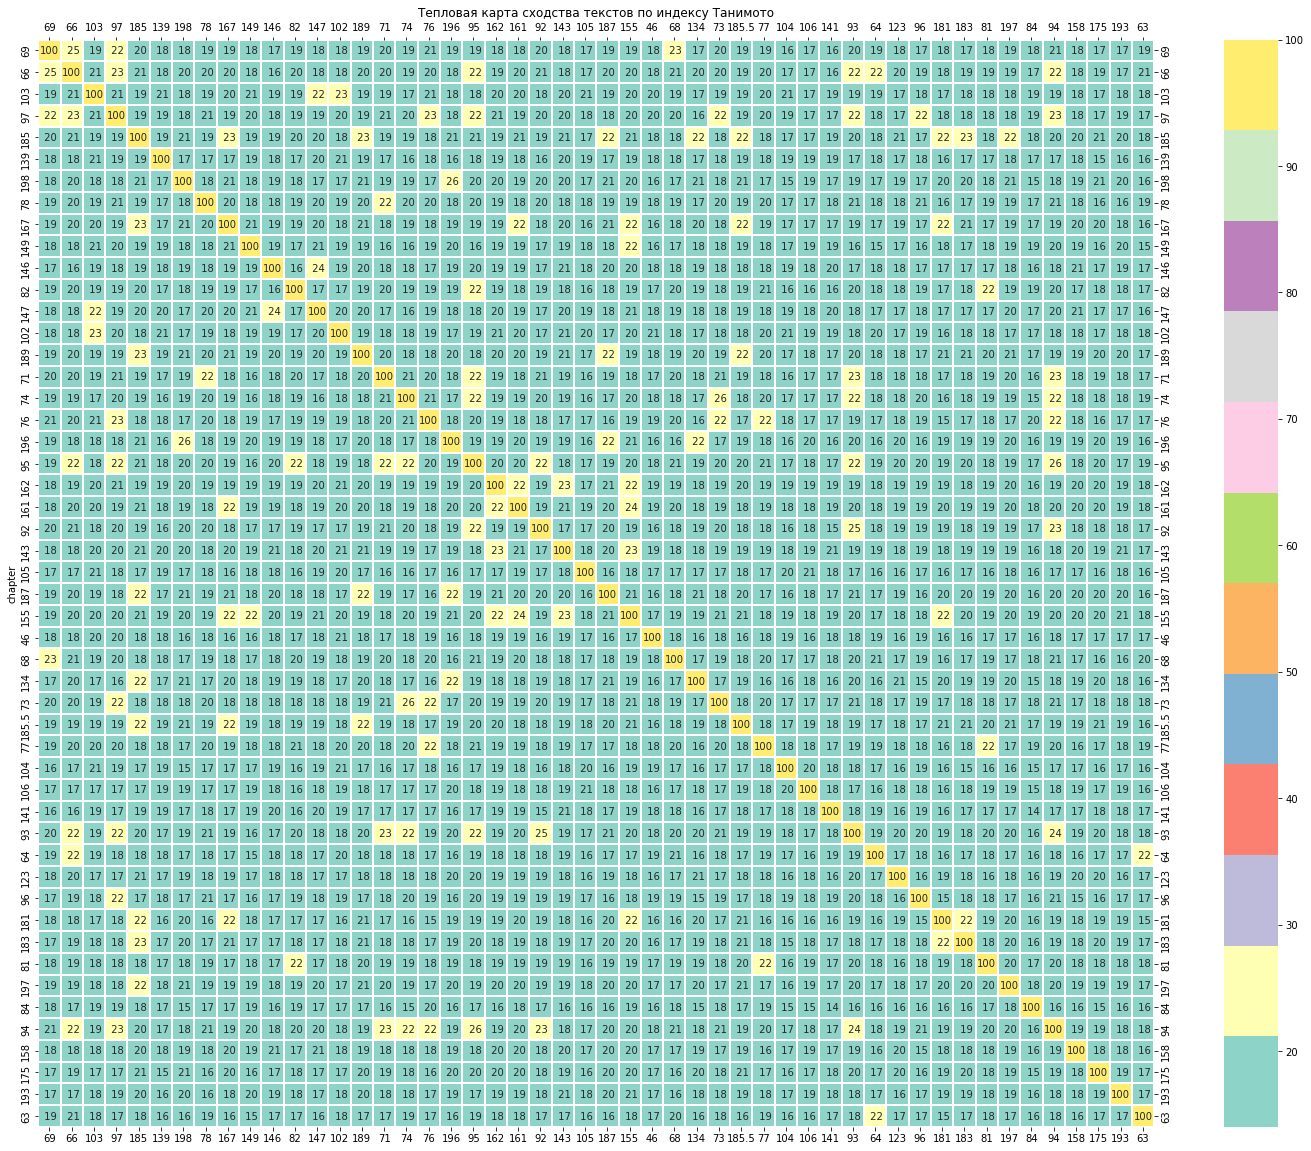

In [15]:
plt.figure(figsize = (25,20))
plt.tick_params(right=True, top=True, labelright=True, labeltop=True)
plt.title("Тепловая карта сходства текстов по индексу Танимото")
sns.heatmap(content_frame, cmap="Set3", linewidths=.05, annot=True, fmt="3")
plt.show()